# Project 1: Analyzing Hurricane Data from 2000-2023

# Introduction

Hurricanes rank among the most devastating natural disasters leaving a lasting impact on communities, infrastructure, and economies. Their immense power can reshape coastlines, cities, and disrupt millions of lives. Understanding hurricane patterns is crucial for preparedness and mitigation and this dataset offers a comprehensive look at hurricanes that have affected North America over the years.

Kaggle Link: https://www.kaggle.com/datasets/middlehigh/north-american-hurricanes-from-2000

The dataset consists of multiple features:
- Year: The year in which the hurricane occurred.
- Name: The name assigned to the hurricane.
- Category: The classification of the hurricane (Tropical Storm, Category 1-5).
- Rain Inch.: The total amount of rainfall in inches.
- Highest Wind Speed: The peak wind speed recorded.
- Damage (USD): The economic damage caused in US dollars.
- Fatalities: The number of human casualties.
- Areas Affected: The geographical regions impacted by the hurricane.

Key questions this analysis aims to answer include:
- How does the highest wind speed of a hurricane relate to the economic damage it causes? 
- How has the frequency of intense hurricanes changed from 2000 to 2023?
- What is the distribution of hurricanes by category?

# Python Imports

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in our data

In [12]:
df = pd.read_csv('Datasets/Hurricane Data.csv')

# Describe our Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                125 non-null    int64  
 1   Name                125 non-null    object 
 2   Category            125 non-null    object 
 3   Rain Inch.          124 non-null    float64
 4   Highest Wind Speed  125 non-null    int64  
 5   Damage(USD)         111 non-null    object 
 6   Fatalities          125 non-null    int64  
 7   Affected Areas      125 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 7.9+ KB


In [17]:
df.shape

(125, 8)

In [19]:
df.describe()

,Year,Rain Inch.,Highest Wind Speed,Fatalities
count,125.000000,124.000000,125.000000,125.000000
mean,2010.936000,11.318250,93.400000,55.176000
std,6.854177,8.550155,40.608874,279.067545
min,2000.000000,0.500000,40.000000,0.000000
25%,2005.000000,5.272500,60.000000,2.000000
50%,2010.000000,9.000000,75.000000,6.000000
75%,2017.000000,15.025000,130.000000,34.000000
max,2023.000000,41.650000,215.000000,3059.000000


# Data Cleaning/Pre-Processing

First we will drop duplicate values to avoid skewing the results, as repeated entries could over-represent certain hurricanes.

In [23]:
df_clean = df.drop_duplicates()

In [25]:
df_clean.shape

(125, 8)

Next we will check for missing values which reveals some gaps in the "Rain Inch." and "Damage (USD)" columns. Rows with missing rainfall data will be removed since accurate precipitation measurements are essential for understanding a hurricane’s impact.

In [28]:
df.isnull().sum()

Year                   0
Name                   0
Category               0
Rain Inch.             1
Highest Wind Speed     0
Damage(USD)           14
Fatalities             0
Affected Areas         0
dtype: int64

In [30]:
df = df.dropna(subset=['Rain Inch.'])

In [32]:
df.shape

(124, 8)

In [34]:
df[df['Damage(USD)'].isnull()]['Category'].value_counts()

Category
TS            10
Category 4     1
Category 2     1
Category 1     1
Name: count, dtype: int64

Tropical storms will be removed from the dataset because 10 of them don’t have any damage values recorded. This likely means that these storms were less severe and didn’t cause significant economic damage. If we keep them in the dataset it could make it look like hurricanes generally cause less damage than they actually do leading to misleading conclusions.

Since the goal of this study is to look at the intensity and impact of stronger storms it makes more sense to focus only on Category 1 to Category 5 hurricanes. These higher-category storms are typically more destructive and give a better picture of the trends in hurricane intensity and damage over the years.

In [37]:
df_clean = df[df['Category'] != 'TS']

In [39]:
df_clean.shape

(70, 8)

In [41]:
df_clean.isnull().sum()

Year                  0
Name                  0
Category              0
Rain Inch.            0
Highest Wind Speed    0
Damage(USD)           3
Fatalities            0
Affected Areas        0
dtype: int64

In [44]:
df_clean = df_clean.dropna(subset=['Damage(USD)'])

In [62]:
df_clean.shape

(67, 8)

# Visualizations

## Visulation #1: Hurricane Damage vs Wind Speed

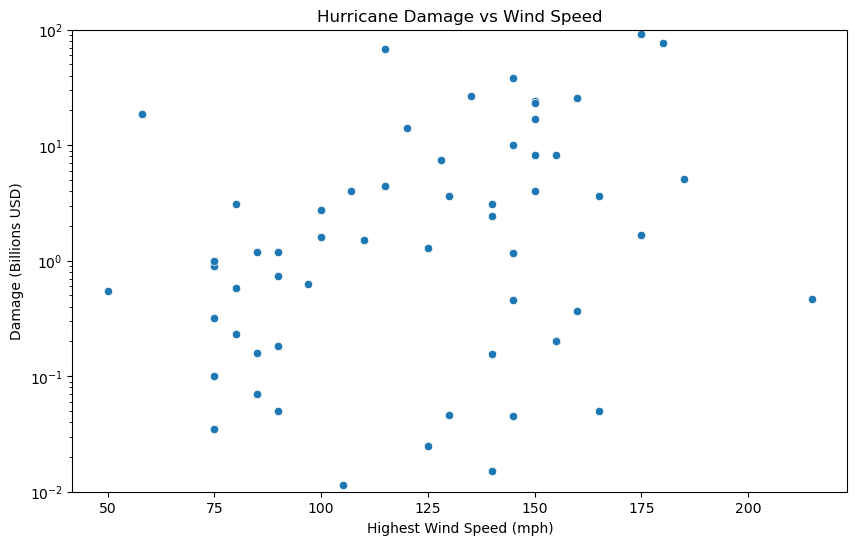

In [64]:
df_scatter = df_clean.copy()
df_scatter['Damage(USD)'] = pd.to_numeric(df_scatter['Damage(USD)'], errors='coerce')

# Convert damage to billions for better readability
df_scatter['Damage(USD)'] = df_scatter['Damage(USD)'] / 1_000_000_000

# Scatter plot of Highest Wind Speed vs Damage
plt.figure(figsize=(10,6))
sns.scatterplot(x='Highest Wind Speed', y='Damage(USD)', data=df_scatter)
plt.title('Hurricane Damage vs Wind Speed')
plt.xlabel('Highest Wind Speed (mph)')
plt.ylabel('Damage (Billions USD)')

# Set y-axis limits to range from 1 billion to 100 billion
plt.ylim(0.01, 100)  # Adjust to include small damage values but still focus on larger ones

# Use logarithmic scale for the y-axis to compress the spread of values
plt.yscale('log')

plt.show()

#### Visulation #1 Conclusion

Looking at the scatter plot there is a positive relationship between the highest wind speed of a hurricane and the economic damage caused. As the wind speeds go up the economic impact also increases, especially for hurricanes with a major status (Category 3 or above). I used a logarithmic scale for the damage so that trends from both small and large-scale damage hurricane events can be observed more effectively. While there are a few outliers where hurricanes with lower wind speeds still caused major damage, the overall takeaway is that stronger storms tend to have a bigger impact.

## Visulation #2 Frequency of Intense Hurricanes over the Years

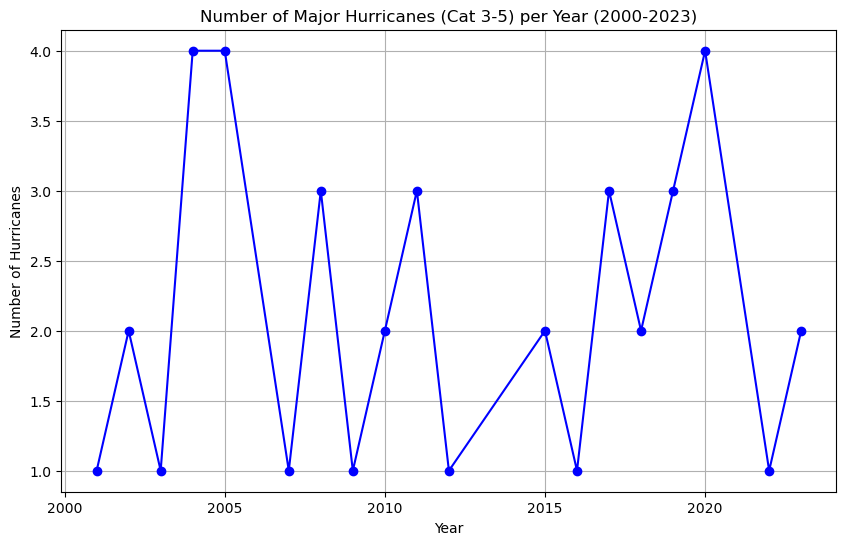

In [135]:
# Create a copy of the cleaned DataFrame for intensity analysis
df_intensity = df_clean.copy()

# Remove 'Category ' prefix to get only the number
df_intensity['Category'] = df_intensity['Category'].str.replace('Category ', '')

# Filter for high-end category hurricanes (3, 4, and 5)
high_categories = ['3', '4', '5']
high_cat_df = df_intensity[df_intensity['Category'].isin(high_categories)]

# Count the number of high-end category hurricanes per year
hurricanes_per_year = high_cat_df.groupby('Year').size()

# Plot the line chart using plt.plot()
plt.figure(figsize=(10, 6))
plt.plot(hurricanes_per_year.index, hurricanes_per_year.values, marker='o', color='blue')
plt.title('Number of Major Hurricanes (Cat 3-5) per Year (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.grid(True)
plt.show()

#### Visualization #2 Conclusion

Looking at the chart it’s clear that the number of high-category hurricanes varies quite a bit from year to year without any obvious pattern of increase or decrease. Some years, like 2004, 2005, and 2020, stand out with four powerful hurricanes each. These spikes could be due to specific weather patterns or environmental factors at play during those years including warmer sea temperatures or unusual atmospheric conditions. However, there are years with very few intense hurricanes, such as 2001, 2003, 2007, 2009, and 2022, where only one high-category storm was recorded. This kind of variation suggests that hurricanes don’t follow a predictable pattern but are influenced by a mix of complex factors. From this data alone, there isn’t enough evidence to say that hurricanes are getting more intense over time.

## Visualization #3 Distribution of Hurricanes by Category

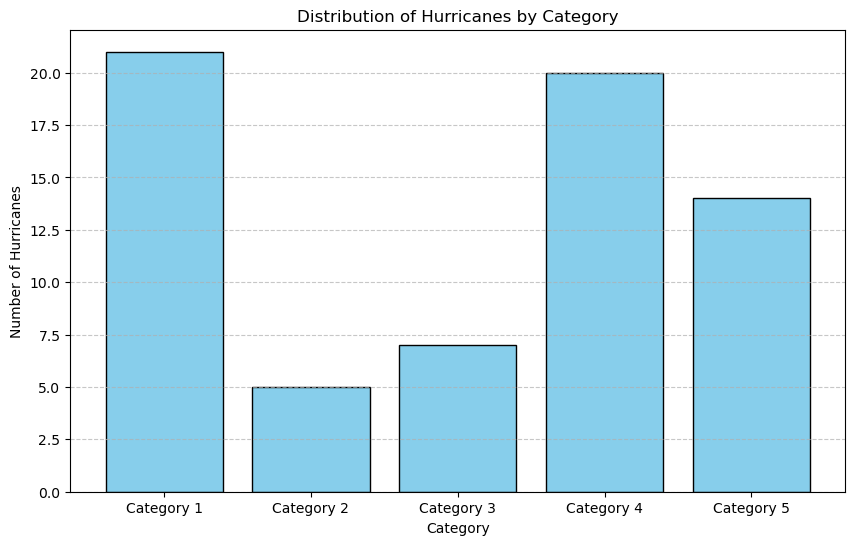

In [131]:
# Create a copy of the cleaned DataFrame for distribution analysis
df_distribution1 = df_clean.copy()

# Count the number of hurricanes in each category and sort them
category_counts = df_distribution['Category'].value_counts().sort_index()

# Plot the bar chart using plt.bar()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Hurricanes by Category')
plt.xlabel('Category')
plt.ylabel('Number of Hurricanes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Visualization #3 Conclusion

The distribution of hurricanes by category shows some interesting trends. Category 1 hurricanes are the most common with 21 occurrences from 2000 to 2023. What’s surprising is that Category 4 hurricanes are almost as frequent as Category 1 with 20 recorded events. This shows that extremely powerful storms which usually cause significant damage can more regularly than expected. Category 5 hurricanes although less common still show up a lot with 14 instances and surpass the total of Category 3 and 2 hurricanes combined. This highlights that North America has faced a fair share of the most destructive hurricanes.

# Overall Takeaways

I was able to find answers to my initial questions. The data showed a clear link between wind speed and economic damage which was that stronger hurricanes generally cause more financial loss. When looking at the frequency of intense hurricanes there wasn’t a clear pattern of increase or decrease over time but there was a lot of variation from year to year. The breakdown of hurricanes by category also revealed how often each type occurs showing that powerful storms are more common than expected. Overall, this analysis gave me a better understanding of hurricane patterns and their impacts from 2000 to 2023.

# Impact

This project gives useful insights into hurricane patterns and their economic impacts but it’s important to think about how these visualizations might be interpreted. One concern is that people could misread the data or oversimplify the findings which leads to misleading conclusions about hurricane trends or risks. For example, since the analysis didn’t show a clear increase in intense hurricanes, some might assume that the threat isn’t growing even though other factors like flooding or storm surges could be getting worse. Another limitation is that the data only covers North America which leaves out the bigger picture of hurricane activity around the world. Recognizing these gaps helps us understand the results in context and shows where more research is needed to get a fuller picture.

# References

- https://www.kaggle.com/datasets/middlehigh/north-american-hurricanes-from-2000
- https://matplotlib.org/stable/tutorials/pyplot.html
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html